In [1]:
import pandas as pd

In [2]:
friday_data = pd.read_csv("../Analysis/output/taxi_report_17.csv")

In [3]:
friday_data = friday_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [4]:
friday_data.rename(columns={'Longitude': 'Latitude','Latitude':'Longitude'},inplace=True)

In [5]:
friday_data =friday_data.set_index(friday_data.time,drop=True)

In [6]:
sample_dataset_weekend = friday_data['18:50:00':'19:00:01']

In [7]:
weekday_data = pd.read_csv("../Analysis/output/taxi_report_15.csv")

In [8]:
weekday_data = weekday_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [9]:
weekday_data.rename(columns={'Longitude': 'Latitude','Latitude':'Longitude'},inplace=True)

In [10]:
weekday_data =weekday_data.set_index(weekday_data.time,drop=True)

In [11]:
sample_dataset_weekday = weekday_data['18:50:00':'19:00:01']

In [12]:
len(sample_dataset_weekday),len(sample_dataset_weekend)

(29415, 43960)

In [13]:
ten_percent_sample_weekday = sample_dataset_weekday.sample(frac=0.1, replace=False)

In [14]:
ten_percent_sample_weekend = sample_dataset_weekend.sample(frac=0.1, replace=False)

In [15]:
len(ten_percent_sample_weekday),len(ten_percent_sample_weekend)

(2942, 4396)

In [16]:
ten_percent_sample_weekend.to_csv('weekend.csv',index=False)

In [17]:
ten_percent_sample_weekday.to_csv('weekday.csv',index=False)

In [18]:
import matplotlib
%matplotlib inline
from pylab import *
from matplotlib import ticker

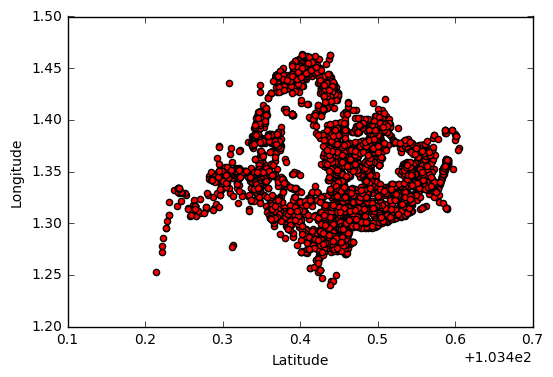

In [19]:
scatter(x= list(ten_percent_sample_weekend['Latitude']),
        y=list(ten_percent_sample_weekend['Longitude']),c='red')
xlabel("Latitude")
ylabel("Longitude")
# xlim(min(ten_percent_sample_weekend.Latitude),max(ten_percent_sample_weekend.Latitude))
# ylim(min(ten_percent_sample_weekend.Longitude),max(ten_percent_sample_weekend.Longitude))



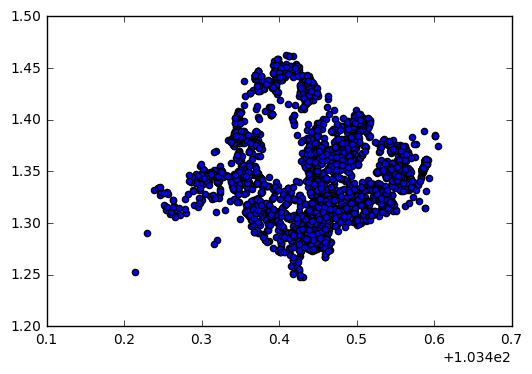

In [20]:
matplotlib.pyplot.scatter(x= list(ten_percent_sample_weekday['Latitude']),y=list(ten_percent_sample_weekday['Longitude']))

Variables of interest:

1. Latitude
2. Longitude


[![Screenshot from 2017-04-11 14-42-33.png](https://s22.postimg.org/fyc936sc1/Screenshot_from_2017-04-11_14-42-33.png)](https://postimg.org/image/tf97m22nh/)



The Parzen window kernel is defined as the expectation of Probability density function.

Breaking down:

Lets say there is a point (Lat, Long). Parsen Density Kernel has a Kernel window area with side h. Area of the kernel is h to the power the number of dimensions of a point for which we are identifying probability density. In our case, (Lat,Long) is of 2 dimension. A Kernel function returns 1 if the given point is within the window of all other neighboring points or Zero otherwise. We normalise the kernal function output by dividing with (total number of points and the window)

In [21]:
import seaborn as sns

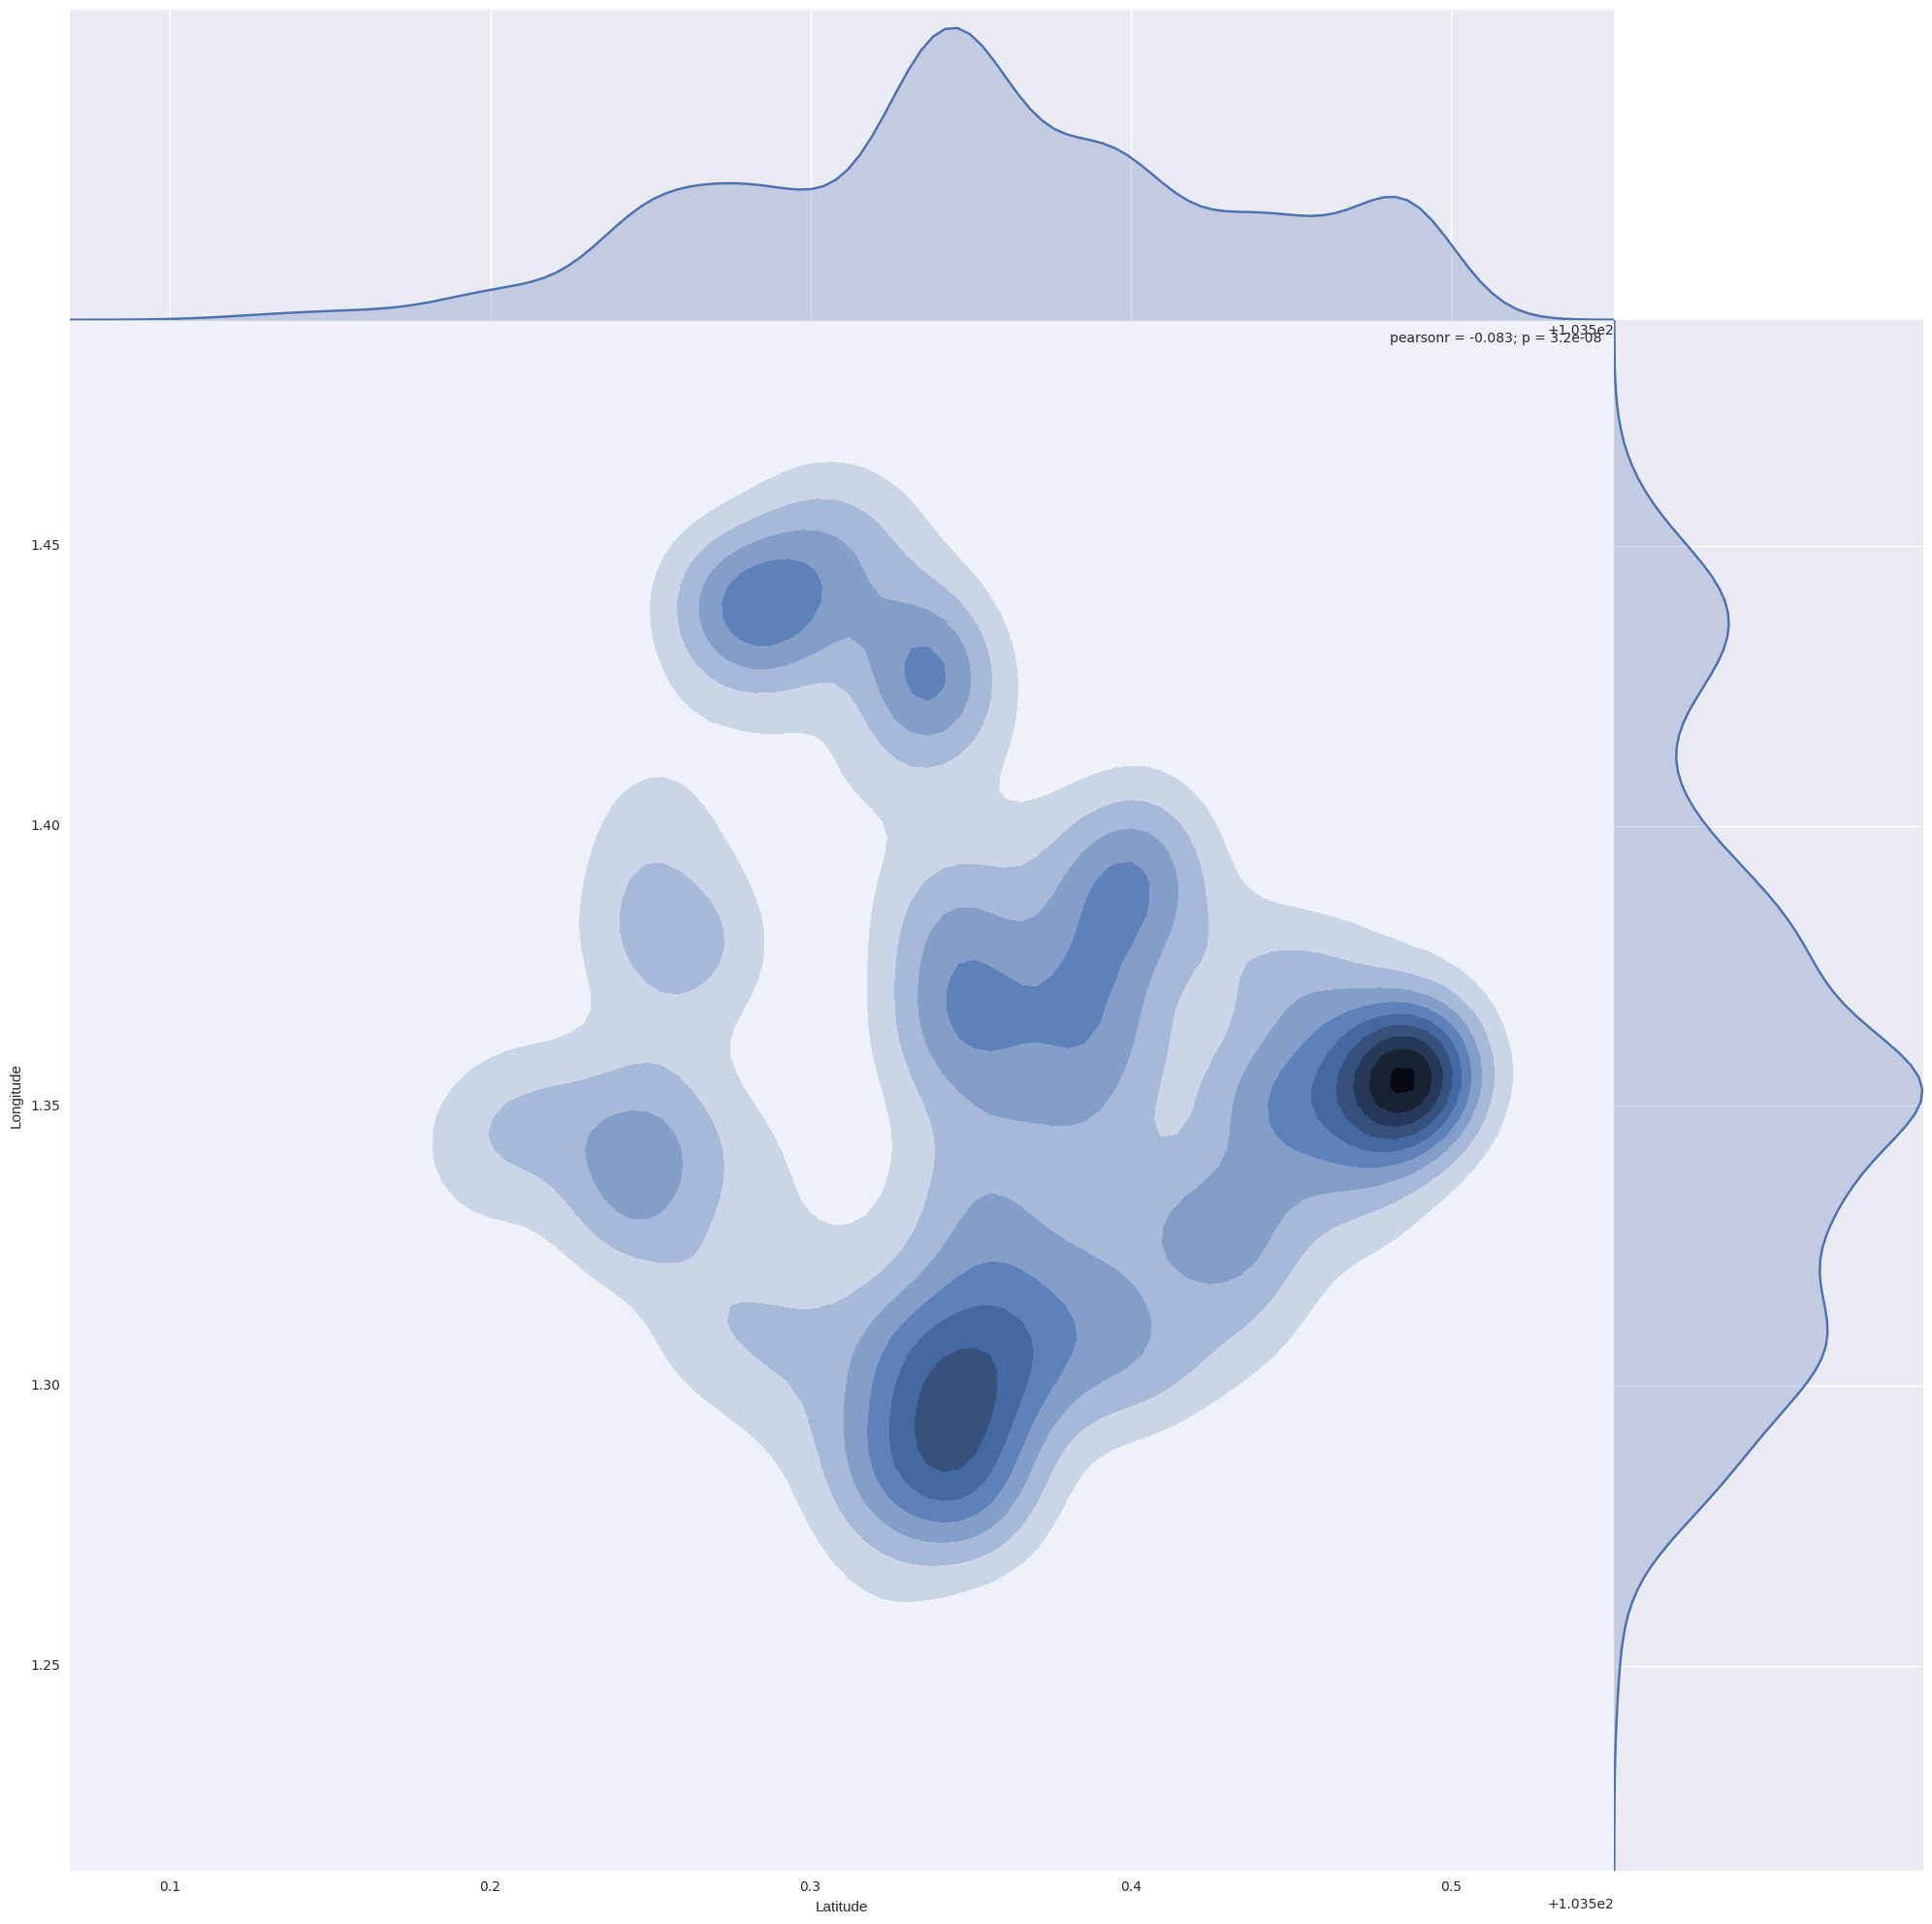

In [22]:
weekend_plot = sns.jointplot(ten_percent_sample_weekend.Latitude,ten_percent_sample_weekend.Longitude,kind='kde',size=20,space=0)

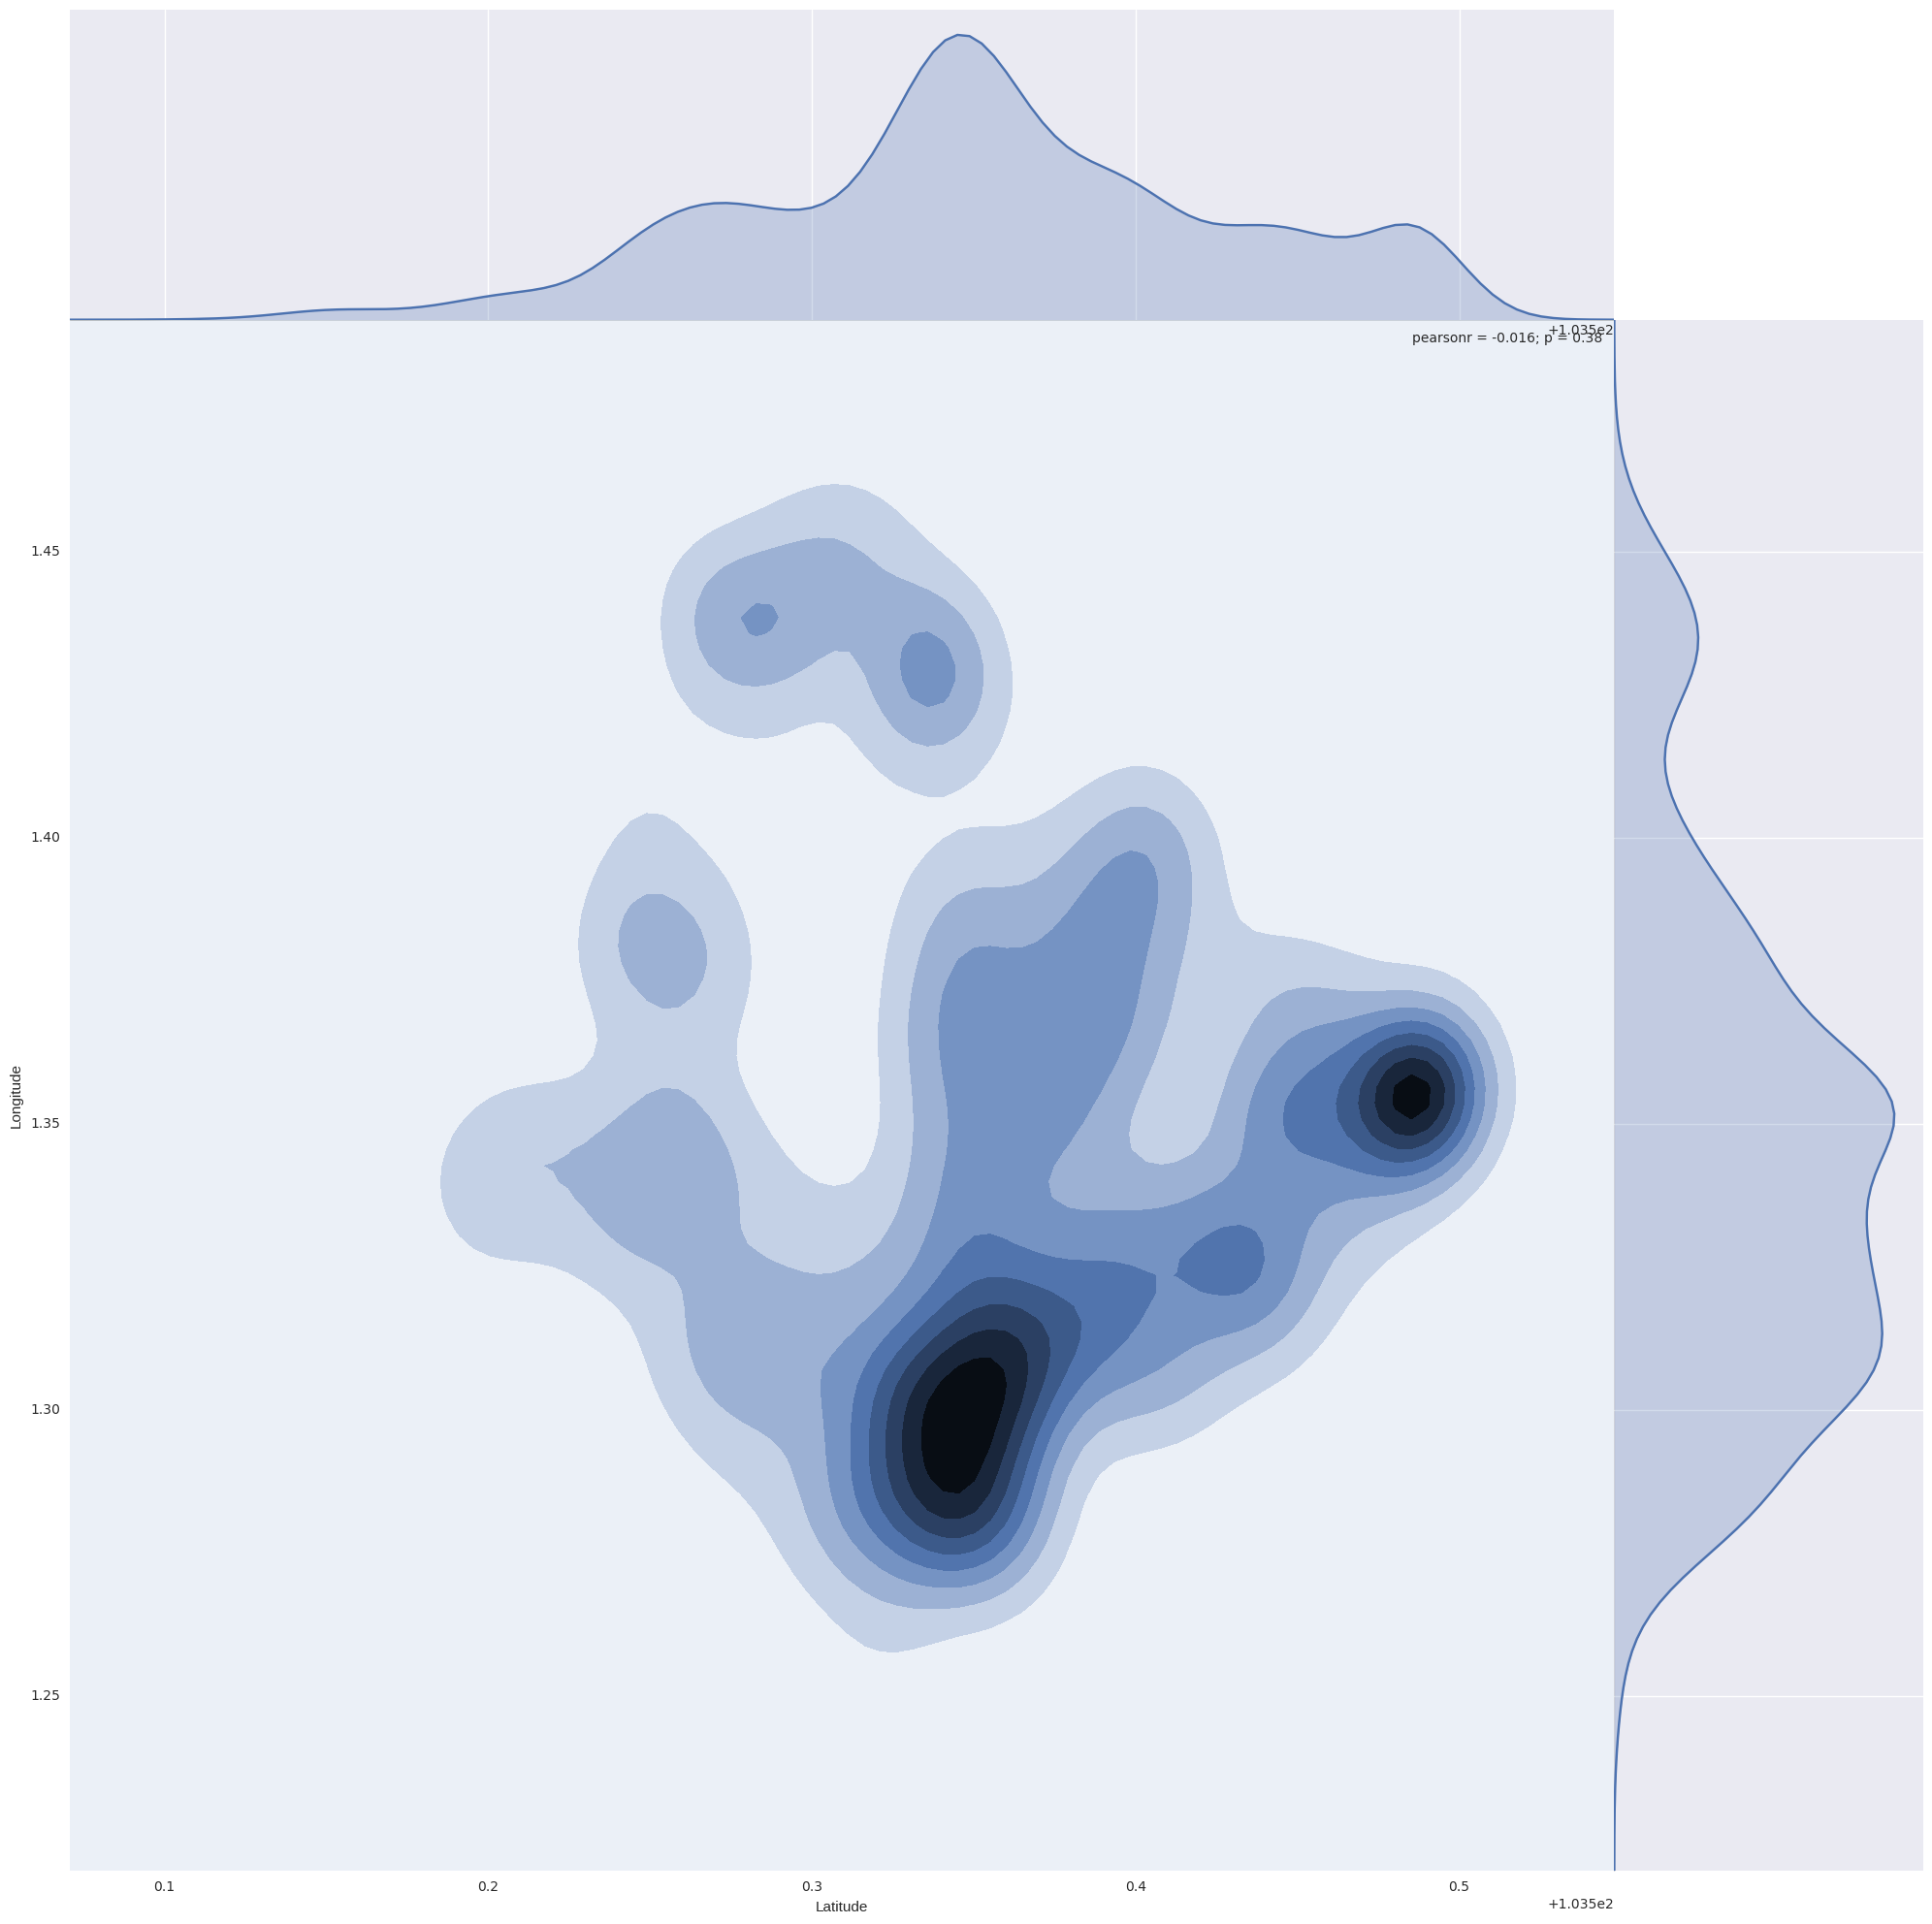

In [23]:
weekday_plot = sns.jointplot(ten_percent_sample_weekday.Latitude,ten_percent_sample_weekday.Longitude,kind='kde',size=20,space=0)

In [1]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 10))
sns.kdeplot(100*ten_percent_sample_weekend.Latitude, 100*ten_percent_sample_weekend.Longitude, ax=ax, kernel='epa',gridsize=100)
sns.rugplot(ten_percent_sample_weekend.Latitude, color="g", ax=ax)
sns.rugplot(ten_percent_sample_weekend.Longitude, vertical=True, ax=ax);

NameError: name 'matplotlib' is not defined

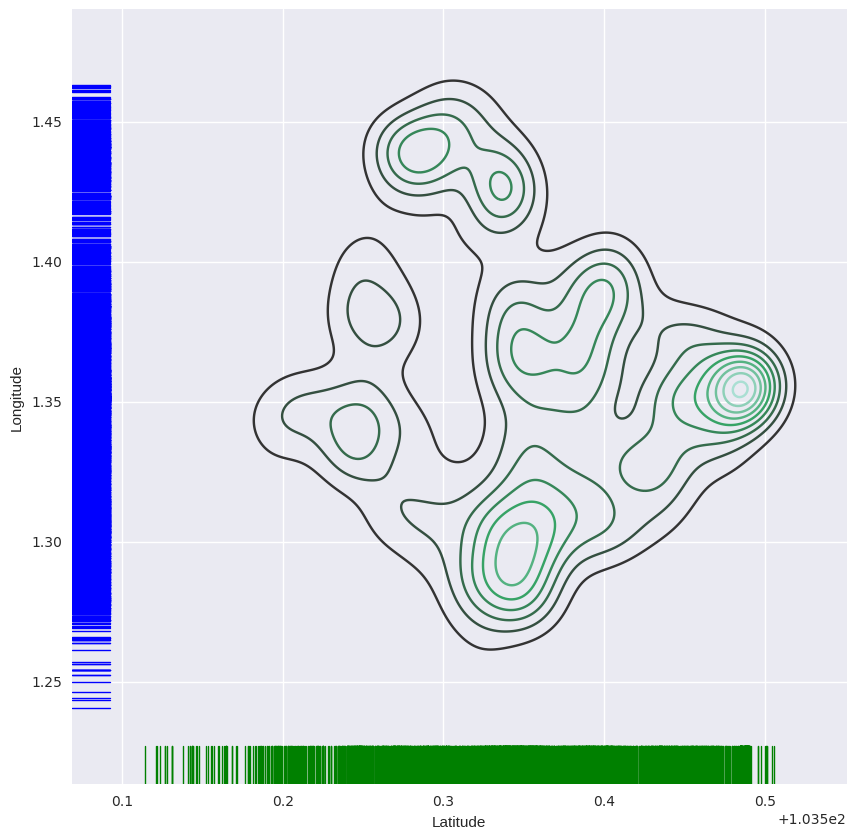

In [36]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 10))
sns.kdeplot(ten_percent_sample_weekend.Latitude, ten_percent_sample_weekend.Longitude, ax=ax, kernel='epa',gridsize=500)
sns.rugplot(ten_percent_sample_weekend.Latitude, color="g", ax=ax)
sns.rugplot(ten_percent_sample_weekend.Longitude, vertical=True, ax=ax);

KeyboardInterrupt: 

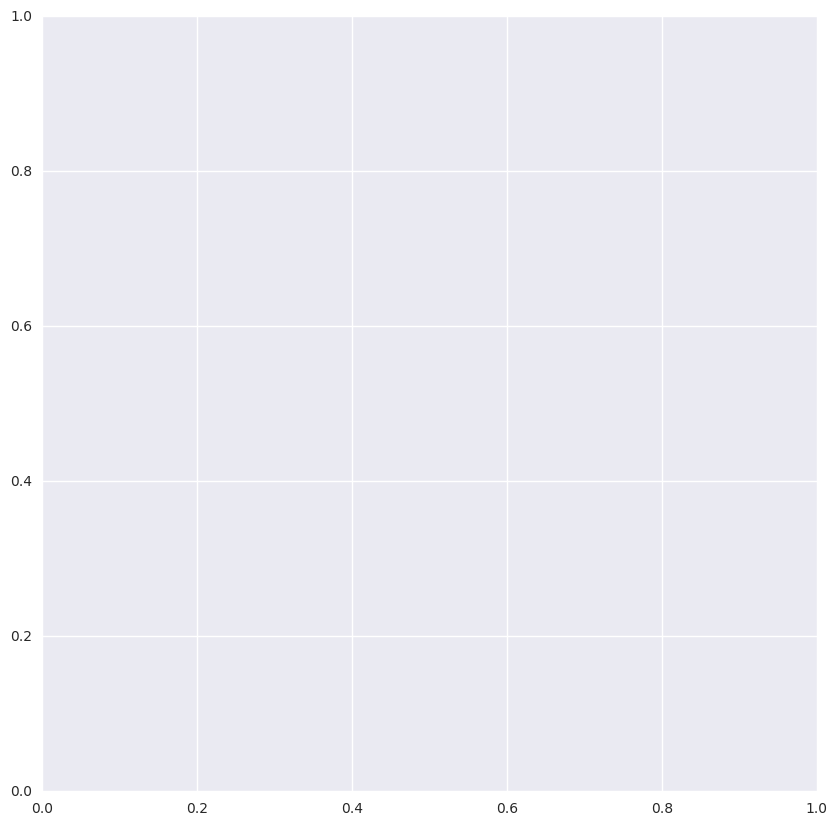

In [37]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 10))
sns.kdeplot(ten_percent_sample_weekend.Latitude, ten_percent_sample_weekend.Longitude, ax=ax, kernel='epa',gridsize=10000)
sns.rugplot(ten_percent_sample_weekend.Latitude, color="g", ax=ax)
sns.rugplot(ten_percent_sample_weekend.Longitude, vertical=True, ax=ax);

In [25]:
from scipy import stats

In [26]:
two_d_lat_long_weekend =  [list(ten_percent_sample_weekend.Longitude),
                               list(ten_percent_sample_weekend.Latitude)]

In [27]:
kernel = stats.gaussian_kde(two_d_lat_long_weekend)

In [28]:
kernel

In [29]:
min(ten_percent_sample_weekend.Longitude),max(ten_percent_sample_weekend.Longitude)

(1.2405200000000001, 1.46323)

In [30]:
min(ten_percent_sample_weekend.Latitude),max(ten_percent_sample_weekend.Latitude)

(103.61408, 104.0055)

In [31]:
X,Y = np.mgrid[1.2407900000000001:1.4686600000000001:1000j, 103.61408:104.0055:1000j]

In [ ]:
sns.kdeplot(data=ten_percent_sample_weekend)